<a id="1"></a>
<b><h2 style='border:0; color:white; background:purple'><center>Anti-Rumor</center><h3></b>

![](https://www.motherjones.com/wp-content/uploads/fakenews_0.jpg?w=2400&h=1350&crop=1)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:crimson; border:0' role="tab" aria-controls="home"><center>Navigation</center></h3>

* [**Ensemble**](#10)
  * [**Dataset**](#11)
  * [**Visualization and Analysis**](#12)
  * [**Training and Model fitting**](#13)
  * [**Logistic Regression**](#14)
  * [**Decision Tree**](#15)
  * [**Gradient Boosting**](#16)
  * [**Random Forest**](#17)

<a id="10"></a>
<h3 style='background:purple; border:0; color:white;'><center>Ensamble</center></h3>
<p>Ensemble Combines multiple machine learning models onto one predictive model to improve predictive performance.<br> Instead of learning one complex models, it learn several simple models and combine output to improve final decision <br>

<b>There's 2 groups of Ensemble methods</b>
<ul>
<li>Sequential Ensemble method</li>
<li>Parallel Ensemble method</li>
</ul>

---

<center>Averaging</center>
<p>Is when all models contribute equally hence <b>>P=P1+P2/2</b>
<br>
Equal weights are assigned to different models despite some models performing better
</p>

---

<center>Weighted Average</center>
<p>
The contribution of models is based on their weights
<br>
<b>W1+W2+W3=1</b>
</p>

---

<center>Begging</center>
<p>Combine result of different models into 1 thus reducing the variance of an estimate by taking the mean
of multiple estimates</p>
<br>
<b>There's 3 steps to perform begging</b>
<ul>
<li>Create randomly sampled datasets of the original training data A.K.A Bootstrapping</li>
<li>Build and fit several different classifiers to each of these diverse copies</li>
<li>Take the average of all the predictions to make a final overall predictions</li>
</ul>

---

<center>Gradient boosting method</center>
<p>Trains several models ion a very gradual, additive, and sequential manner
<br>
Minimizes the loss function of a model by adding weak learners using gradient procedure
</p>
<br>
<b>There's 3 steps to Gradient boosting</b>
<ul>
<li>A loss function to be optimized</li>
<li>Weak learner to make predictions</li>
<li>Additive model to add weak learners to minimize the loss function</li>
</ul>

<a id=11></a>
<h3>Importing Libraries</h3>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pl
from sklearn.metrics import mean_squared_error, accuracy_score, mean_squared_log_error, classification_report
import re 
import string
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
fake = pd.read_csv('databases/Fake.csv')

In [6]:
true = pd.read_csv('databases/True.csv')

In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Reflect the DataFrame over its main diagonal by writing rows as columns

In [9]:
fake.transpose()

,0,1,2,3,4,5,6,7,8,9,...,23471,23472,23473,23474,23475,23476,23477,23478,23479,23480
title,Donald Trump Sends Out Embarrassing New Year’...,Drunk Bragging Trump Staffer Started Russian ...,Sheriff David Clarke Becomes An Internet Joke...,Trump Is So Obsessed He Even Has Obama’s Name...,Pope Francis Just Called Out Donald Trump Dur...,Racist Alabama Cops Brutalize Black Boy While...,"Fresh Off The Golf Course, Trump Lashes Out A...",Trump Said Some INSANELY Racist Stuff Inside ...,Former CIA Director Slams Trump Over UN Bully...,WATCH: Brand-New Pro-Trump Ad Features So Muc...,...,Seven Iranians freed in the prisoner swap have...,#Hashtag Hell & The Fake Left,Astroturfing: Journalist Reveals Brainwashing ...,The New American Century: An Era of Fraud,Hillary Clinton: ‘Israel First’ (and no peace ...,McPain: John McCain Furious That Iran Treated ...,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,How to Blow $700 Million: Al Jazeera America F...,10 U.S. Navy Sailors Held by Iranian Military ...
text,Donald Trump just couldn t wish all Americans ...,House Intelligence Committee Chairman Devin Nu...,"On Friday, it was revealed that former Milwauk...","On Christmas day, Donald Trump announced that ...",Pope Francis used his annual Christmas Day mes...,The number of cases of cops brutalizing and ki...,Donald Trump spent a good portion of his day a...,In the wake of yet another court decision that...,Many people have raised the alarm regarding th...,Just when you might have thought we d get a br...,...,"21st Century Wire says This week, the historic...",By Dady Chery and Gilbert MercierAll writers ...,Vic Bishop Waking TimesOur reality is carefull...,Paul Craig RobertsIn the last years of the 20t...,Robert Fantina CounterpunchAlthough the United...,21st Century Wire says As 21WIRE reported earl...,21st Century Wire says It s a familiar theme. ...,Patrick Henningsen 21st Century WireRemember ...,21st Century Wire says Al Jazeera America will...,21st Century Wire says As 21WIRE predicted in ...
subject,News,News,News,News,News,News,News,News,News,News,...,Middle-east,Middle-east,Middle-east,Middle-east,Middle-east,Middle-east,Middle-east,Middle-east,Middle-east,Middle-east
date,"December 31, 2017","December 31, 2017","December 30, 2017","December 29, 2017","December 25, 2017","December 25, 2017","December 23, 2017","December 23, 2017","December 22, 2017","December 21, 2017",...,"January 20, 2016","January 19, 2016","January 19, 2016","January 19, 2016","January 18, 2016","January 16, 2016","January 16, 2016","January 15, 2016","January 14, 2016","January 12, 2016"


In [10]:
true.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21407,21408,21409,21410,21411,21412,21413,21414,21415,21416
title,"As U.S. budget fight looms, Republicans flip t...",U.S. military to accept transgender recruits o...,Senior U.S. Republican senator: 'Let Mr. Muell...,FBI Russia probe helped by Australian diplomat...,Trump wants Postal Service to charge 'much mor...,"White House, Congress prepare for talks on spe...","Trump says Russia probe will be fair, but time...",Factbox: Trump on Twitter (Dec 29) - Approval ...,Trump on Twitter (Dec 28) - Global Warming,Alabama official to certify Senator-elect Jone...,...,"Mata Pires, owner of embattled Brazil builder ...","U.S., North Korea clash at U.N. forum over nuc...","U.S., North Korea clash at U.N. arms forum on ...",Headless torso could belong to submarine journ...,North Korea shipments to Syria chemical arms a...,'Fully committed' NATO backs new U.S. approach...,LexisNexis withdrew two products from Chinese ...,Minsk cultural hub becomes haven from authorities,Vatican upbeat on possibility of Pope Francis ...,Indonesia to buy $1.14 billion worth of Russia...
text,WASHINGTON (Reuters) - The head of a conservat...,WASHINGTON (Reuters) - Transgender people will...,WASHINGTON (Reuters) - The special counsel inv...,WASHINGTON (Reuters) - Trump campaign adviser ...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...","WEST PALM BEACH, Fla (Reuters) - President Don...",The following statements were posted to the ve...,The following statements were posted to the ve...,WASHINGTON (Reuters) - Alabama Secretary of St...,...,"SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",GENEVA (Reuters) - North Korea and the United ...,GENEVA (Reuters) - North Korea and the United ...,COPENHAGEN (Reuters) - Danish police said on T...,UNITED NATIONS (Reuters) - Two North Korean sh...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"LONDON (Reuters) - LexisNexis, a provider of l...",MINSK (Reuters) - In the shadow of disused Sov...,MOSCOW (Reuters) - Vatican Secretary of State ...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
subject,politicsNews,politicsNews,politicsNews,politicsNews,politicsNews,politicsNews,politicsNews,politicsNews,politicsNews,politicsNews,...,worldnews,worldnews,worldnews,worldnews,worldnews,worldnews,worldnews,worldnews,worldnews,worldnews
date,"December 31, 2017","December 29, 2017","December 31, 2017","December 30, 2017","December 29, 2017","December 29, 2017","December 29, 2017","December 29, 2017","December 29, 2017","December 28, 2017",...,"August 22, 2017","August 22, 2017","August 22, 2017","August 22, 2017","August 21, 2017","August 22, 2017","August 22, 2017","August 22, 2017","August 22, 2017","August 22, 2017"


In [11]:
fake['class']=0
true['class']=1

In [12]:
fake.shape, true.shape

((23481, 5), (21417, 5))

In [13]:
fake_test = fake.tail(10) #get last 10 samples
for i in range(23480, 23470, -1):
    fake.drop([i],axis = 0, inplace = True) #drop last 10 samples

#repeat for true    
true_test = true.tail(10) #get last 10 samples
for i in range(21416, 21406, -1):
    true.drop([i],axis = 0, inplace = True) #drop last 10 samples
    
        

In [14]:
fake.shape, true.shape

((23471, 5), (21407, 5))

we've deleted 10 rows from each datasets it's crucial to always check the shape to avoid dim error encounters

In [15]:
fake_test['class']=0
true_test['class']=1
#Ignore the warning message of copying dataframe
import warnings
warnings.filterwarnings("ignore")

<a id="12"></a>
<h3 style='background:purple; border:0; color:white;'><center>Visualization & Analysis</center></h3>

In [16]:
fake_test.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [17]:
true_test.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


Now to merge fake and true tests and then we merge both fake and new csv

In [18]:
merge = pd.concat([fake,true], axis=0)
merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [19]:
merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [20]:
merge.isnull()

,title,text,subject,date,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21402,False,False,False,False,False
21403,False,False,False,False,False
21404,False,False,False,False,False
21405,False,False,False,False,False


In [21]:
merge.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

So the data has no null values

---

<h3>Pie Chart</h3>

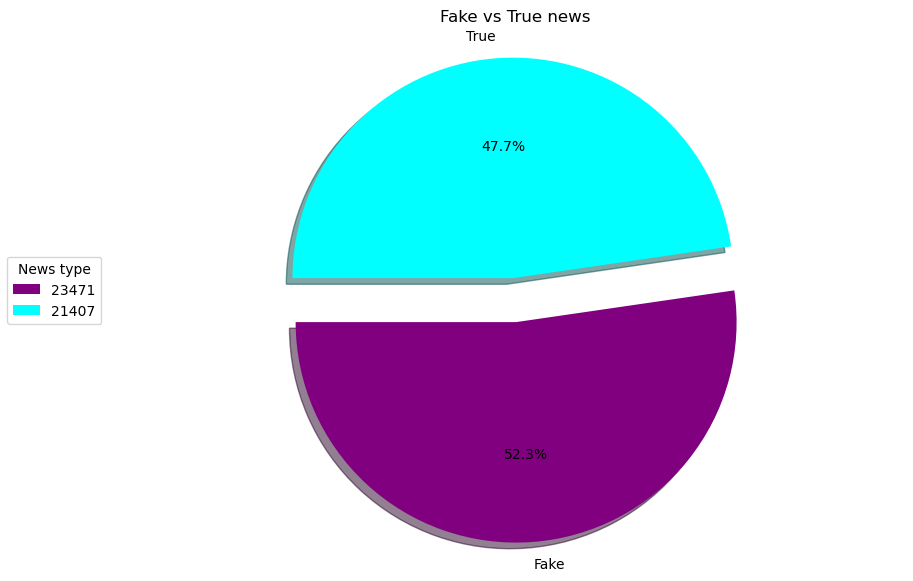

In [22]:
num_fake = fake['class'].count()
num_true = true['class'].count()
data = [num_fake, num_true]

#creating pie chart
pie = plt.figure(figsize=(10,7))
plt.pie(data, labels = ['Fake', 'True'], explode=[0.0, 0.2], colors=['purple', 'cyan'], autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
pie.legend(data,
          title ="News type",
          loc ="center left",
          )
plt.title("Fake vs True news")
plt.show()

Now we want to make a histogram of the date but the data is not 
in a proper format date is December 31, 2017
we want to make a method to turn that object into a string
and remove unnecessary characters plus the month

In [23]:
fake.head(1)['date']

0    December 31, 2017
Name: date, dtype: object

In [24]:
example=fake.head(1)
example1=example['date']
type(example1)
string_example = str(example1)

In [25]:
import re
filter_example=re.sub(r'[^\d]+','',string_example)
filter_example

'0312017'

In [26]:
new_str=''

for i in range(len(filter_example)):
    if i >= 3:
        new_str += filter_example[i]
new_str

'2017'

In [27]:
import re

def filter_date(df):
    #create empty array
    empty_array=[]
    empty_str=''
    for i in range(20):
        df_iter = df.head(i) #get only the index i of df
        date=df_iter['date'] #get only the date
        str_date = str(date) #convert to date string
        filter_date=re.sub(r'[^\d]+','',str_date) #subtract spaces and other characters
        
        #filter_date = 0312017, we want to get only 2017 as a sting
        
        for i in range(len(filter_date)):
            if i>= 3 : #if index is greater than 3
                empty_str += filter_date[i] #add characters to empty string
                if len(empty_str) == 4:
                    empty_array += empty_str #add string to array
    return(empty_array)


In [28]:
'''filter = filter_date(fake)
filter'''

'filter = filter_date(fake)\nfilter'

In [29]:
true['category'] = 1

In [30]:
fake['category'] = 0

In [31]:
merged_temp = pd.concat([true,fake],axis=0)

Balance of True vs Fake news

<AxesSubplot:xlabel='category', ylabel='count'>

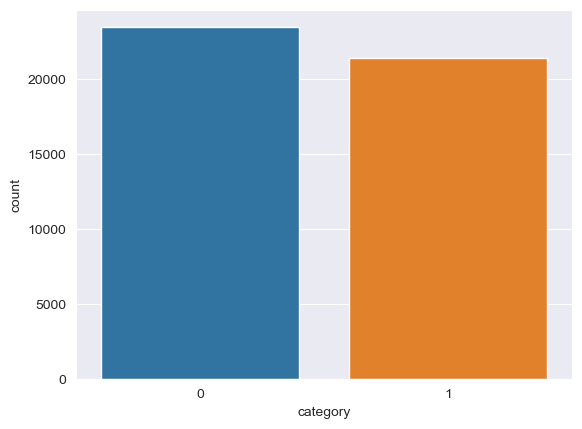

In [32]:
sns.set_style("darkgrid")
sns.countplot(merged_temp.category)

<AxesSubplot:xlabel='subject', ylabel='count'>

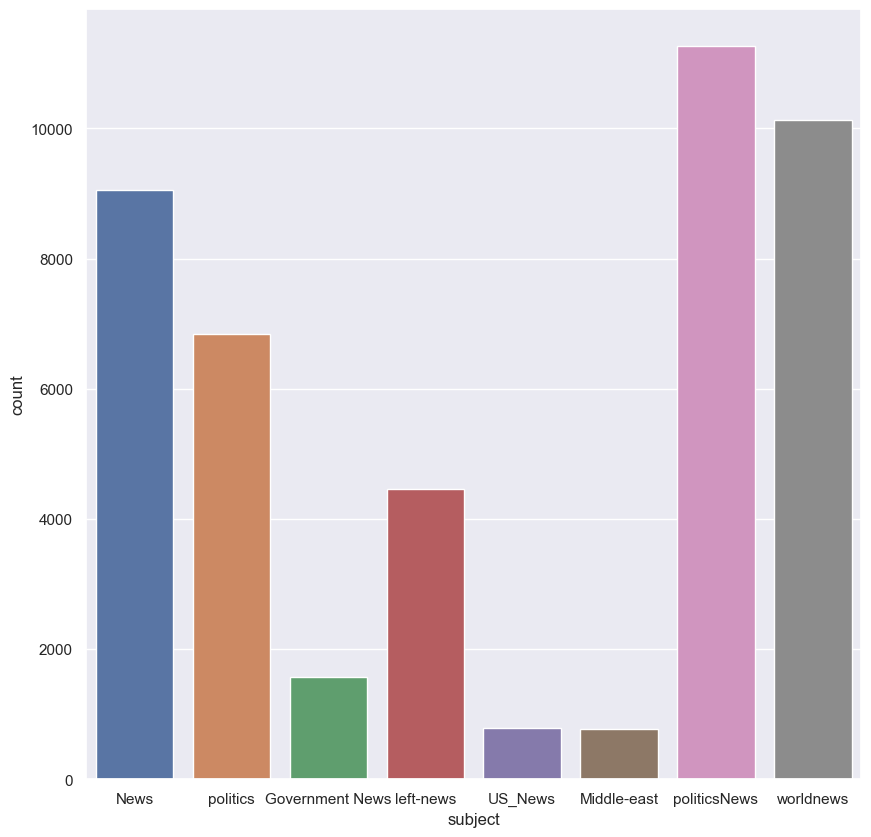

In [33]:
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(10, 10)})
sns.countplot(merge.subject)

Countplot news count based on the topic

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

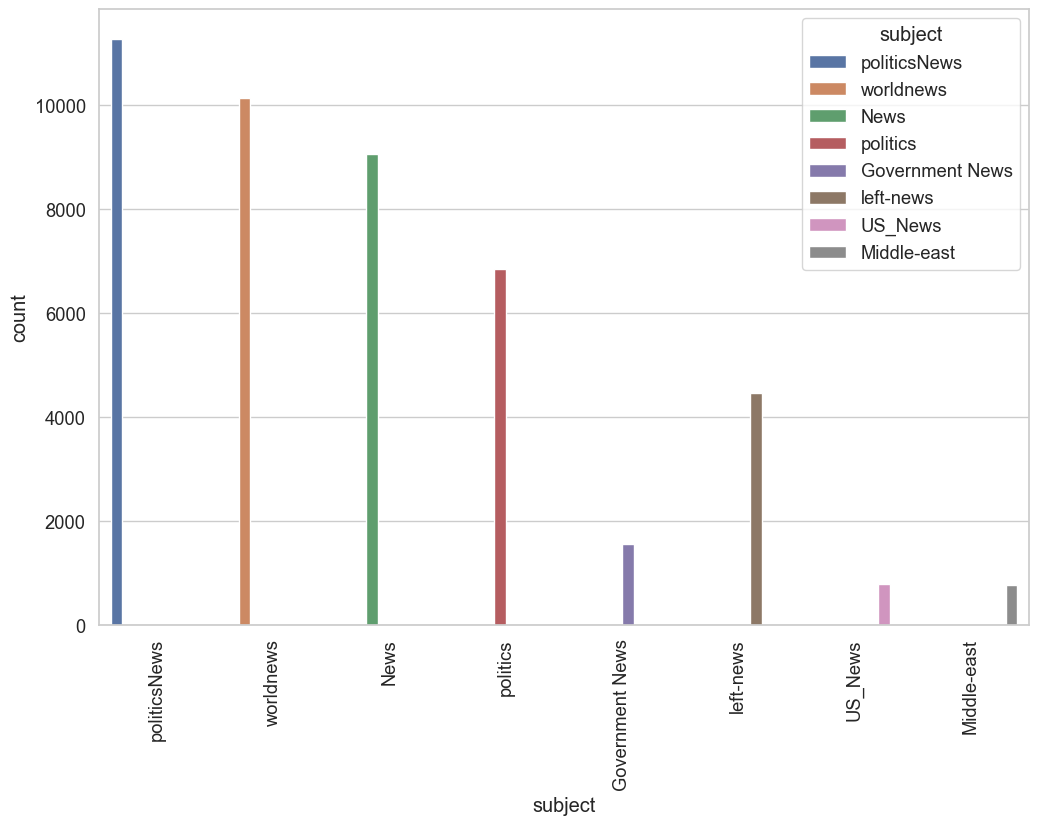

In [34]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "subject" , data = merged_temp)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Histogram <- Number of Words in fake and Trusted news

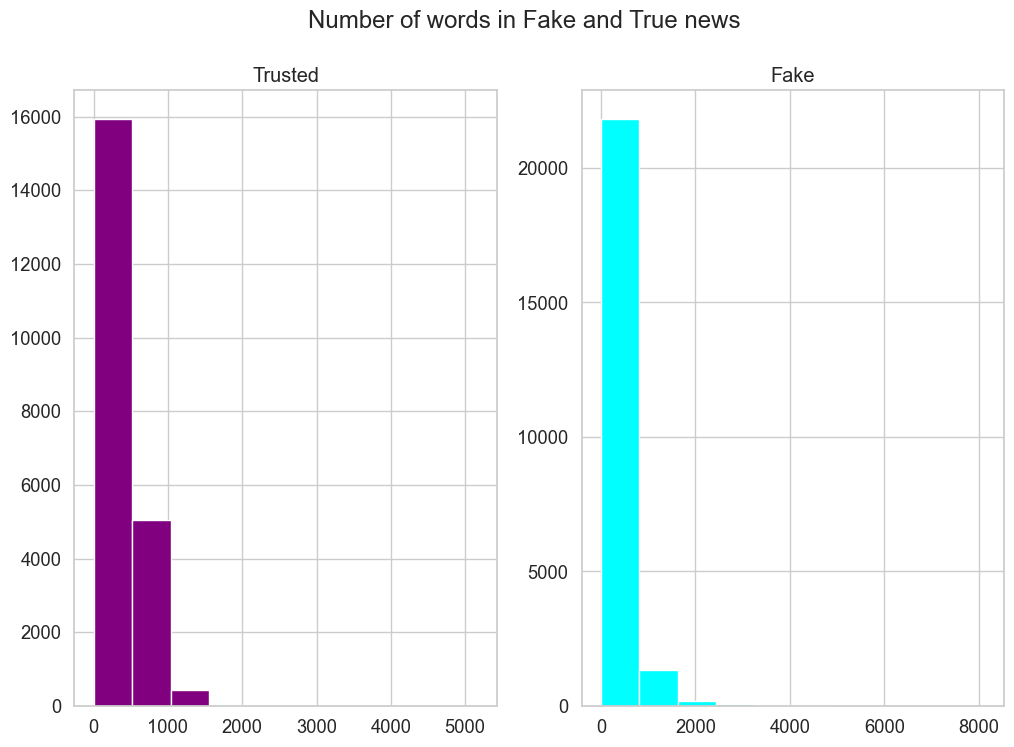

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=merged_temp[merged_temp['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='purple')
ax1.set_title('Trusted')


text_len=merged_temp[merged_temp['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='cyan')
ax2.set_title('Fake')
fig.suptitle('Number of words in Fake and True news')
plt.show()

Most used words in fake news

In [36]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(fake.text)
corpus[:5]

['Donald', 'Trump', 'just', 'couldn', 't']

In [37]:
from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(5)
most_common = dict(most_common)
most_common

{'the': 482649, 'to': 285736, 'of': 232914, 'and': 212720, 'a': 202709}

In [38]:
list(most_common.keys())

['the', 'to', 'of', 'and', 'a']

In [39]:
list(most_common.values())

[482649, 285736, 232914, 212720, 202709]

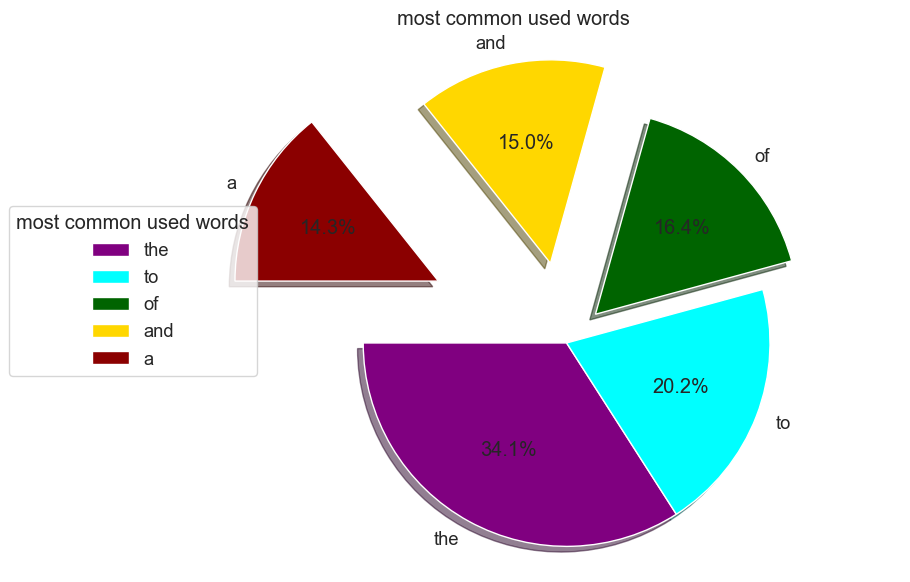

In [40]:
#creating pie chart
most_common_data = list(most_common.values())

pie = plt.figure(figsize=(10,7))
color = ['purple', 'cyan', 'darkgreen', 'gold', 'darkred']
plt.pie(most_common_data, labels = ['the', 'to', 'of', 'and', 'a'], explode=[0.0, 0.0, 0.2, 0.4, 0.7], colors=color, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
pie.legend(list(most_common.keys()),
          title ="most common used words",
          loc ="center left",
          )
plt.title("most common used words")
plt.show()

In [41]:
merge_d = merge.drop(['title', 'subject', 'date'], axis=1)

<h3>Cleaning and analysis</h3>

In [42]:
merge_d.isnull()

,text,class
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
21402,False,False
21403,False,False
21404,False,False
21405,False,False


In [43]:
merge_d.isnull().sum()

text     0
class    0
dtype: int64

In [44]:
merge_d = merge_d.sample(frac=1)
merge_d.head()

,text,class
6948,Supporting Donald Trump was a senile move too ...,0
21252,But wait If WMD s have been banned by the inte...,0
9476,WASHINGTON (Reuters) - The U.S. House of Repre...,1
18278,The mainstream media will never show you both ...,0
19470,MOSCOW (Reuters) - Saudi Arabia s King Salman ...,1


In [45]:
merge_d.reset_index(inplace=True)
merge_d.drop(['index'], axis=1, inplace=True)
merge_d.columns

Index(['text', 'class'], dtype='object')

In [46]:
merge_d.head()

,text,class
0,Supporting Donald Trump was a senile move too ...,0
1,But wait If WMD s have been banned by the inte...,0
2,WASHINGTON (Reuters) - The U.S. House of Repre...,1
3,The mainstream media will never show you both ...,0
4,MOSCOW (Reuters) - Saudi Arabia s King Salman ...,1


---

Creating function to process text

In [47]:
def wordopt(text):
    text = text.lower()
    text=re.sub('\[.*\]', '', text) # remove spaces and process text
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [48]:
merge_d['text'] = merge_d['text'].apply(wordopt)

Define dependent and independent variables

In [49]:
x = merge_d["text"]
y = merge_d["class"]

<a id="13"></a>
<h3 style='background:purple; border:0; color:white;'><center>Training & Model</center></h3>

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xx_train = vectorization.fit_transform(x_train)
xx_test = vectorization.transform(x_test)

<a id =14></a>
<h3 style='color:crimson'><center>Logistic Regression</center></h3>

In [52]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(xx_train,y_train)

LogisticRegression()

In [53]:
pred = logistic.predict(xx_test)#text

Testing Accuracy

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5797
           1       0.99      0.99      0.99      5423

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



<a id=15>
<h3 style='color:crimson'><center>Decision Tree Classifier</center></h3>

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xx_train, y_train)#model fit


DecisionTreeClassifier()

In [56]:
pred_dtc=dtc.predict(xx_test)

Accuracy

In [57]:
dtc.score(xx_test, y_test)

0.9950980392156863

Classification report

In [58]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5797
           1       1.00      0.99      0.99      5423

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



<a id=16></a>
<h3 style='color:crimson'><center>Gradient Boosting Classifier</center></h3>

In [59]:
from sklearn.ensemble import GradientBoostingClassifier #GB builds an additive model in a forward stage-wise fashion; it allows for the optimization

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(xx_train, y_train)

In [ ]:
pred_gbc = gbc.predict(xx_test)

In [ ]:
gbc.score(xx_test, y_test)

0.9951871657754011

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5911
           1       0.99      1.00      0.99      5309

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



<a id=17></a>
<h3 style='color:crimson'><center>Random Forest Classifier</center></h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(xx_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc=rfc.predict(xx_test)


In [ ]:
rfc.score(xx_test, y_test)

0.9914438502673797

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5911
           1       0.99      0.99      0.99      5309

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, xx_test, y_test, scoring='accuracy', cv=10))

[0.98484848 0.97771836 0.98217469 0.98128342 0.97860963 0.98217469
 0.98217469 0.98128342 0.98039216 0.98752228]


In [ ]:
accuracy = cross_val_score(rfc, xx_test, y_test, scoring='accuracy', cv= 10).mean()
print('Accuracy: ', accuracy)

Accuracy:  0.9818181818181818


In [ ]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) #apply text processing
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    # Predict for all the models
    pred_LR = logistic.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_GBC = gbc.predict(new_xv_test)
    pred_RFC = rfc.predict(new_xv_test)

    #Sum gives 50% more vote to logistic Regression as it proved to be more accurate
    sum = (pred_LR[0])*2 + (pred_DT[0] + pred_GBC[0] + pred_RFC[0])*0.5
    #we take the average
    average_pred = sum/4
    #percentage of the average
    average_percent = average_pred *100

    #print all models predictions
    return f'{average_percent}%'

In [ ]:
import gradio as gr

In [ ]:
ui = gr.Interface(fn=manual_testing, inputs = 'text', outputs='text')

In [ ]:
ui.launch(share='True')

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a738e78b-48bb-4230.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


model drift
data drift
word correlation
over-fitting
zero shot learning
few shot learning